# 1.0 Full Exploratory Data Analysis

## Libraries

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import cookiecutter_conda_data_science.utils.paths as path
import janitor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Download data

### Specify input and output files

In [24]:
covid_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

covid_file = path.data_raw_dir("time_series_covid19_confirmed_global.csv")

### Run download

In [25]:
!curl {covid_url} -o {covid_file}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 74 1777k   74 1328k    0     0  4210k      0 --:--:-- --:--:-- --:--:-- 4229k
100 1777k  100 1777k    0     0  4657k      0 --:--:-- --:--:-- --:--:-- 4664k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
  0     0    0     0    0     0      0      0 --:-

## Process data

### Read data

In [26]:
input_covid_file = path.data_raw_dir("time_series_covid19_confirmed_global.csv")

In [27]:
covid_df = pd.read_csv(input_covid_file)
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Columns: 552 entries, Province/State to 7/22/21
dtypes: float64(2), int64(548), object(2)
memory usage: 1.2+ MB


In [28]:
covid_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,134653,136643,137853,137853,137853,137853,141489,142414,142414,143183
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132608,132616,132629,132647,132665,132686,132697,132740,132763,132797
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,147883,148797,149906,151103,152210,153309,154486,155784,157005,158213
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14167,14167,14239,14273,14273,14273,14359,14379,14379,14464
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,40138,40327,40530,40631,40707,40805,40906,41061,41227,41405


### Process data

In [29]:
processed_df = (
    covid_df
    .select_columns(["Country/Region", "*/*/*"])
    .pivot_longer(
        index="Country/Region",
        names_to="date"
    )
    .transform_column("date", pd.to_datetime)
    .clean_names()
)

processed_df.head()

c:\Users\alejo\.conda\envs\cookiecutter_conda_data_science\lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)


,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Save output data

In [30]:
output_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [31]:
processed_df.to_csv(output_covid_file, index=False)

## Explore data

### Read data

In [32]:
processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [33]:
processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152892 entries, 0 to 152891
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  152892 non-null  object
 1   date            152892 non-null  object
 2   value           152892 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.5+ MB


In [34]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Explore data

In [35]:
sns.set_style("whitegrid")

In [36]:
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)

#### Appearance of new covid-19 cases in Latam

Subset data.

In [37]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

c:\Users\alejo\.conda\envs\cookiecutter_conda_data_science\lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.query` instead.
  return method(self._obj, *args, **kwargs)
c:\Users\alejo\.conda\envs\cookiecutter_conda_data_science\lib\site-packages\pandas_flavor\register.py:157: DeprecationWarning: This function will be deprecated in a 1.x release. Kindly use `pd.DataFrame.query` instead.
  return method(self._obj, *args, **kwargs)


,country_region,date,value
6,Argentina,2020-01-22,0
30,Brazil,2020-01-22,0
57,Chile,2020-01-22,0


Plot time series.

In [44]:
import cookiecutter_conda_data_science.visualization.visualize as visualize

c:\Users\alejo\.conda\envs\cookiecutter_conda_data_science\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alejo\.conda\envs\cookiecutter_conda_data_science\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alejo\.conda\envs\cookiecutter_conda_data_science\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alejo\.conda\envs\cookiecutter_conda_data_science\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categoric

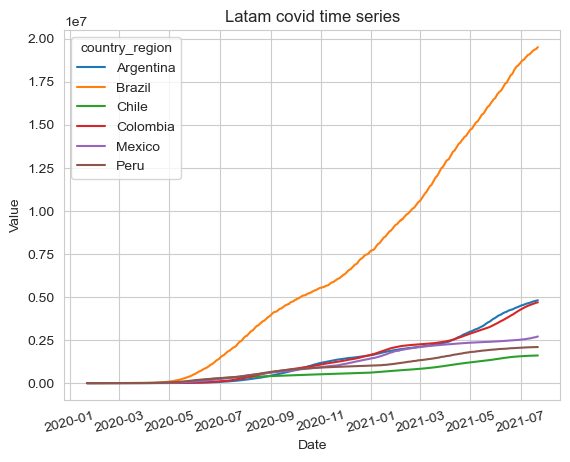

In [45]:
visualize.covid_time_series(some_latam_countries_df)

#### Latam in global context

Top `n` countries.

In [42]:
top_countries_df = (
    processed_covid_df
    .select_columns(["country_region", "value"])
    .groupby(["country_region"])
    .aggregate("sum")
    .sort_values("value", ascending=False)
    .reset_index()
    .head(20)
    .transform_column(
        column_name="country_region",
        function=lambda x: "red" if x in countries else "lightblue",
        dest_column_name="color"
    )
)

top_countries_df.head()

c:\Users\alejo\.conda\envs\cookiecutter_conda_data_science\lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)


,country_region,value,color
0,US,7865514086,lightblue
1,India,4849614063,lightblue
2,Brazil,3635065807,red
3,Russia,1222594749,lightblue
4,France,1170082584,lightblue


Plot to Latam in highlighted bars.

c:\Users\alejo\.conda\envs\cookiecutter_conda_data_science\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alejo\.conda\envs\cookiecutter_conda_data_science\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alejo\.conda\envs\cookiecutter_conda_data_science\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


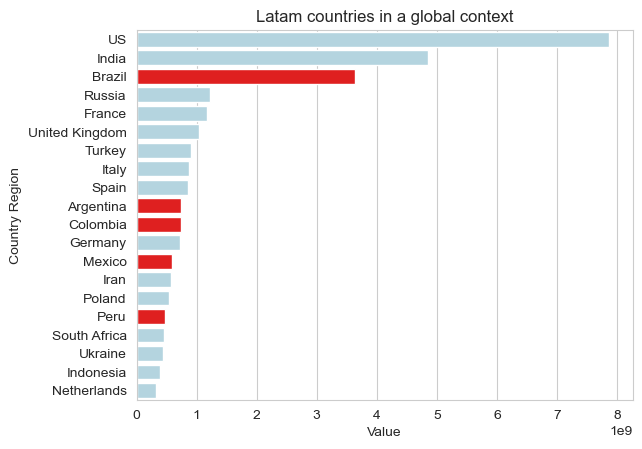

In [43]:
sns.barplot(
    data=top_countries_df,
    x="value",
    y="country_region",
    palette=top_countries_df.color
)

plt.xlabel("Value")
plt.ylabel("Country Region")
plt.title("Latam countries in a global context");